In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import numpy as np

In [ ]:
!wget https://i.stack.imgur.com/UYYqo.jpg

--2023-03-16 12:05:35--  https://i.stack.imgur.com/UYYqo.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 146.75.80.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|146.75.80.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17459 (17K) [image/jpeg]
Saving to: ‘UYYqo.jpg.1’

UYYqo.jpg.1         100%[===================>]  17.05K  --.-KB/s    in 0.001s  

2023-03-16 12:05:35 (16.7 MB/s) - ‘UYYqo.jpg.1’ saved [17459/17459]



In [ ]:
!wget https://i0.wp.com/vitalrecord.tamhsc.edu/wp-content/uploads/2022/07/toothbrushes.jpg?fit=1100%2C625&ssl=1

--2023-03-16 11:10:38--  https://i0.wp.com/vitalrecord.tamhsc.edu/wp-content/uploads/2022/07/toothbrushes.jpg?fit=1100%2C625
Resolving i0.wp.com (i0.wp.com)... 192.0.77.2
Connecting to i0.wp.com (i0.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99668 (97K) [image/jpeg]
Saving to: ‘toothbrushes.jpg?fit=1100,625’

toothbrushes.jpg?fi 100%[===================>]  97.33K  --.-KB/s    in 0.06s   

2023-03-16 11:10:39 (1.61 MB/s) - ‘toothbrushes.jpg?fit=1100,625’ saved [99668/99668]



In [ ]:
!wget https://live.staticflickr.com/7062/13883047454_a2168cec5e_b.jpg

--2023-03-16 11:32:07--  https://live.staticflickr.com/7062/13883047454_a2168cec5e_b.jpg
Resolving live.staticflickr.com (live.staticflickr.com)... 13.249.95.215, 2600:9000:21b8:cc00:0:5a51:64c9:c681, 2600:9000:21b8:6400:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)|13.249.95.215|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘13883047454_a2168cec5e_b.jpg’

13883047454_a2168ce     [ <=>                ] 246.82K  --.-KB/s    in 0.03s   

2023-03-16 11:32:07 (7.66 MB/s) - ‘13883047454_a2168cec5e_b.jpg’ saved [252746]



In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-03-16 10:55:17--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  46.2MB/s    in 5.2s    

2023-03-16 10:55:22 (45.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

--2023-03-16 11:00:25--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2023-03-16 11:00:25 (68.7 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [ ]:
!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

--2023-03-16 11:00:43--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2023-03-16 11:00:44 (22.3 MB/s) - ‘coco.names’ saved [625/625]



In [ ]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [ ]:
img = cv2.imread("/content/UYYqo.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [ ]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [ ]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [ ]:
# def get_optimal_font_scale(text, width):

#     for scale in reversed(range(0, 60, 1)):
#         textSize = cv2.getTextSize(text, fontFace=cv2.FONT_HERSHEY_PLAIN, fontScale=scale/10, thickness=1)
#         new_width = textSize[0][0]
#         if (new_width <= width):
#             return scale/10
#     return 1

# fontScale = 3*(img.shape[1]//6)

In [ ]:
import math
def optimal_font_dims(img, font_scale = 2e-3, thickness_scale = 5e-3):
    h, w, _ = img.shape
    font_scale = min(w, h) * font_scale
    thickness = math.ceil(min(w, h) * thickness_scale)
    return font_scale, thickness

font_scale, thickness = optimal_font_dims(img)

In [ ]:
font_scale

0.16

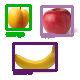

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        # font_size = get_optimal_font_scale(label, fontScale)
        cv2.putText(img, label, (x, y + 30), font, font_scale, color=color, thickness=2)

# image = cv2.putText(image, 'OpenCV', org, font, 
#                    fontScale, color, thickness, cv2.LINE_AA)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
t